In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('north_korea_missile_tests_database_050217.xlsx',
                  index_col = 'F1',
                  na_values = 'Unknown')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 1 to 106
Data columns (total 17 columns):
Date                       106 non-null datetime64[ns]
Date Entered/Updated       106 non-null datetime64[ns]
Missile Name               103 non-null object
Missile Type               103 non-null object
Launch Agency/Authority    10 non-null object
Facility Name              105 non-null object
Facility Location          105 non-null object
Other Name                 61 non-null object
Facility Latitude          105 non-null float64
Facility Longitude         105 non-null float64
Landing Location           79 non-null object
Apogee (km)                45 non-null float64
Distance Travelled (km)    33 non-null float64
Confirmation Status        106 non-null object
Success                    104 non-null object
Additional Information     61 non-null object
Source(s)                  106 non-null object
dtypes: datetime64[ns](2), float64(4), object(11)
memory usage: 14.9+ KB


,Date,Date Entered/Updated,Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee (km),Distance Travelled (km),Confirmation Status,Success,Additional Information,Source(s)
F1,,,,,,,,,,,,,,,,,
1,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Success,The 1984 tests possibly took place over the co...,http://www.nti.org/media/pdfs/north_korea_miss...
2,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...
3,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,200.0,NaN,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...
4,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Failure,NaN,"Joseph S. Bermudez, ""A History of Ballistic Mi..."
5,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,200.0,NaN,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...


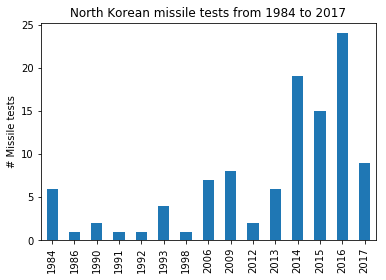

In [28]:
df['Date'].dt.year.value_counts().sort_index().plot(kind="bar")

plt.title('North Korean missile tests from 1984 to 2017')
plt.ylabel('# Missile tests')

plt.show()

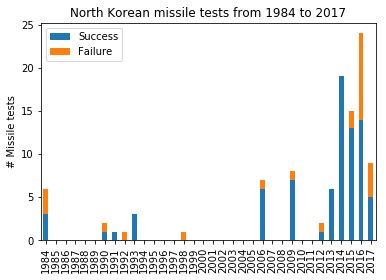

In [65]:
df['Year'] = df['Date'].dt.year

df2 = pd.DataFrame(index = range(1984, 2018))
df2['Success'] = df[df['Success'] == 'Success'].groupby('Year')['Success'].count()
df2['Failure'] = df[df['Success'] == 'Failure'].groupby('Year')['Success'].count()

df2.plot(kind='bar', stacked=True)

plt.title('North Korean missile tests from 1984 to 2017')
plt.ylabel('# Missile tests')

plt.show()

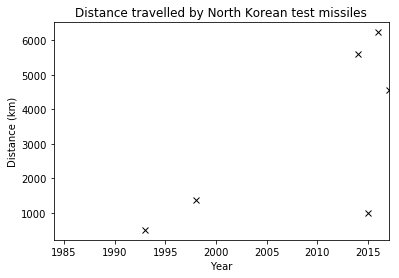

In [64]:
df.groupby('Year')['Distance Travelled (km)'].sum().plot(kind = 'line', style = 'xk')

plt.title('Distance travelled by North Korean test missiles')
plt.ylabel('Distance (km)')

plt.show()